# Introdução

<img src="dataPrepConcepts.jpg" width=1280 height=720 />

#### Para utilizarmos os algoritmos de [machine-learning precisamos passar números!

#### Nossos datasets geralmente são um mix de variáveis numéricas e qualitativas categóricas. Em tese, as variáveis numéricas não precisam de nenhum tratamento para serem passadas para os algoritmos de machine learning, mas mesmo assim, alguns tratamentos específicos, os quais abordaremos em seguida, podem trazer alguns benefíicios durante o treinamento dos nossos modelos. Já as variáveis qualitativas (categóricas), exigem um pré-tratamento para poderem ser transformadas em números. Veremos a seguir algumas formas de fazer isso, quais seus pontos fortes, fracos e abordaremos como fazer esse pré-processamento na prática, com o auxílio de pipelines do ```scikit-learn```.

#### Vamos usar o dataset de diabetes para nossos exemplos.

# Setup

In [2]:
#!pip install category-encoders
#!pip install 
#!pip install --upgrade category-encoders
#!pip install --upgrade feature_engine
#!pip install -U feature-engine

#from feature_engine import categorical_encoders as ce
#from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

In [69]:
# libs
# para installar o category_encoder use --> !pip install category-encoders
# para instalalr o feature_engine use --> !pip install  feature-enginge



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
#from feature_engine.encoding import RareLabelEncoder
#from feature_engine.categorical_encoders import RareLabelCategoricalEncoder, CountFrequencyCategoricalEncoder
from feature_engine.encoding import RareLabelEncoder, MeanEncoder, CountFrequencyEncoder
from feature_engine.discretisation import DecisionTreeDiscretiser
from feature_engine.imputation import (AddMissingIndicator, MeanMedianImputer, CategoricalImputer) 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
# dados
df_diabetes = pd.read_csv('diabetes.csv')
df_titanic = pd.read_csv('titanic_reduced.csv')

In [5]:
#df_titanic.isnull()#.count()
df_titanic.info()
#df_titanic['Age'].isnull().any()
#df_titanic.isnull().any()
#df_titanic = df_titanic.dropna(subset = ['Embarked', 
#                         'Age'
#                        ]
#              )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Embarked  889 non-null    object 
 1   Age       714 non-null    float64
 2   Sex       891 non-null    object 
 3   Pclass    891 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


#### Removemos os nulos.

In [6]:
df_diabetes = df_diabetes.dropna()
df_titanic = df_titanic.dropna()

In [7]:
df_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [8]:
# Dividindo em X e Y
X_diabetes = df_diabetes.drop('class', 
                              axis = 1
                             )
Y_diabetes = df_diabetes['class']
X_titanic = df_titanic.drop('Survived', 
                            axis = 1
                           )
Y_titanic = df_titanic['Survived']




In [9]:
# Dividindo em treino e teste
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, 
                                                                                        Y_diabetes, 
                                                                                        train_size = 0.85, 
                                                                                        random_state = 123
                                                                                       )
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, 
                                                                                    Y_titanic, 
                                                                                    train_size = 0.85, 
                                                                                    random_state = 123
                                                                                   )

# Data Preparation

#### O processo de data preparation é anterior ao treinamento do algoritmo de machine-learning. A ideia é criar um processo que, para cada entrada (feature/variável), realize uma transformação específica. Vamos descrever algumas dessas transformações a partir de agora, começando pelas variáveis numéricas.

## Variáveis Numéricas

#### As variáveis mais fáceis de lidar são as do tipo numérico, pois os algoritmos de machine-learning já são capazes de interpretá-las em sua forma "bruta". Contudo os algoritmos  e seus processos de otimização podem se beneficiar desse processso de transformação. No geral, os algoritmos de machine learning não entendem que as features são de unidades diferentes e podem assumir que variáveis com escala maior devem receber um "peso" maior por isso. Geralmente, algoritmos que se baseiam no cálculo de distâncias ou descidas de gradiente podem sofrer com o fator de escala. Para evitar esse tipo de situação, nós utilizamos métodos de scaling. Agora vamos apresentar três processos de transformação, suas características, pontos fortes e fracos.

### MinMax Scaler

<img src="featureScaling.png" height=416 width=426/>

#### O primeiro transformador que veremos é o MinMaxScaler, que é dado pela expressão abaixo:

<img src=https://cdn-images-1.medium.com/max/800/0*K2QwZ16bEAxA4hUe.jpg height=300 width=300 />

#### Dado uma variável X, transformaremos cada valor de X por meio da expressão acima. Para isso, precisaremos:
- Extrair o Mínimo do vetor X
- Extrair o Máximo do vetor X

In [10]:
# extraindo x para scaling
x_age_train = X_train_diabetes[['age']]
x_mass_train = X_train_diabetes[['mass']]

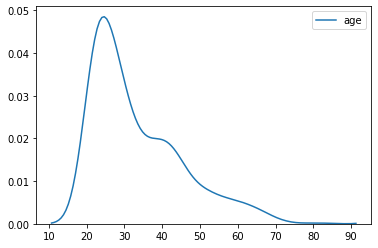

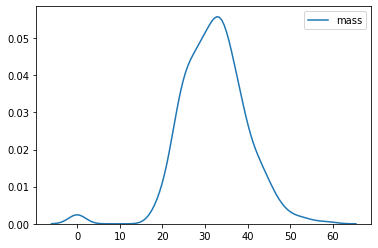

In [11]:
# Checando as distribuições
sns.kdeplot(x_age_train['age'])
plt.show()
sns.kdeplot(x_mass_train['mass'])
plt.show()

In [12]:
# Extraindo máximos e mínimos
x_age_min = np.min(x_age_train)
x_age_max = np.max(x_age_train)
x_mass_min = np.min(x_mass_train)
x_mass_max = np.max(x_mass_train)

In [13]:
# Transformando  age
x_age_train['min_max'] = (x_age_train - x_age_min) / (x_age_max - x_age_min)
# Transformando mass
x_mass_train['min_max'] = (x_mass_train - x_mass_min) / (x_mass_max - x_mass_min)

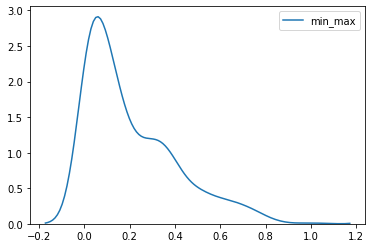

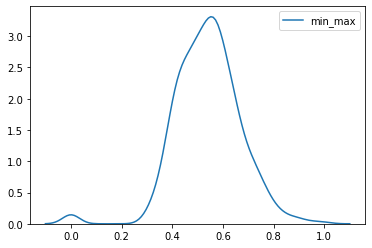

In [14]:
# Checando as distribuições
sns.kdeplot(x_age_train['min_max'])
plt.show()
sns.kdeplot(x_mass_train['min_max'])
plt.show()

#### Note que o formato das distribuições não se altera!! Apenas o range de valores é alterado, para que seja comportado entre $0$ e $1$.

> **Alerta: As transformações precisam ser realizadas no treino e no teste!! Contudo, precisamos utilizar os parâmetros obtidos da base de treino (mínimo e máximo) para replicar a transformação na base de teste. Ou seja, quando formos realizar a transformação, utilizaremos os valores mínimo e máximo extraidos do vetor de treino!!!**

#### Mas como fica isso em produção? Preciso guardar esses valores em algum lugar?

#### SIM.

#### Mas para isso o [`scikit-learn`]() conta com uma série de Classes e Métodos que irão nos ajudar nessa etapa. Implementaremos a classe [`MinMaxScaler`]().

In [15]:
# Usando o MinMaxScaler do scikit-learn
# note que podemos passar uma tupla com o range desejado no fim da transformação
min_max_scaler = MinMaxScaler(feature_range = (0,1))

#### Para utilizar esse transformador, precisaremos dos métodos [`.fit()`]() e [`.transform()`]().

#### No método [`.fit()`](), o transformador extrai o que precisa para realizar a transformação. No nosso caso, isso equivale a extrair os valores máximo e mínimo do vetor. Para isso, passaremos o nosso vetor como parâmetro.

In [16]:
# precisamos aplicar um reshape
min_max_scaler.fit(X_train_diabetes[['age']])

MinMaxScaler()

In [17]:
# para realizar a transformação usamos o .transform()
min_max_scaler.transform(X_train_diabetes[['age']])

array([[0.11666667],
       [0.48333333],
       [0.7       ],
       [0.41666667],
       [0.05      ],
       [0.26666667],
       [0.35      ],
       [0.01666667],
       [0.03333333],
       [0.03333333],
       [0.51666667],
       [0.7       ],
       [0.08333333],
       [0.15      ],
       [0.05      ],
       [0.48333333],
       [0.28333333],
       [0.01666667],
       [0.13333333],
       [0.        ],
       [0.1       ],
       [0.76666667],
       [0.26666667],
       [0.1       ],
       [0.15      ],
       [0.01666667],
       [0.55      ],
       [0.01666667],
       [0.        ],
       [0.11666667],
       [0.25      ],
       [0.35      ],
       [0.16666667],
       [0.03333333],
       [0.68333333],
       [0.        ],
       [0.06666667],
       [0.33333333],
       [0.11666667],
       [0.06666667],
       [0.13333333],
       [0.3       ],
       [0.08333333],
       [0.41666667],
       [0.05      ],
       [0.01666667],
       [0.4       ],
       [0.433

#### Se quisermos aplicar no nosso dataset de treino inteiro, ou seja, em todas nossas features de uma vez, podemos passar o dataframe de treino inteiro. Além disso, o método [`.fit_transform()`]() permite extrair os parâmetros e já aplicar a transformação desejada.

In [18]:
X_train_diabetes_scaled = min_max_scaler.fit_transform(X_train_diabetes)

In [19]:
pd.DataFrame(X_train_diabetes_scaled, 
             columns = X_train_diabetes.columns
            )

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.058824,0.502513,0.590164,0.121212,0.094086,0.425926,0.247652,0.116667
1,0.647059,0.693467,0.606557,0.262626,0.193548,0.607744,0.204526,0.483333
2,0.235294,0.663317,0.704918,0.313131,0.000000,0.471380,0.145602,0.700000
3,0.235294,0.577889,0.590164,0.000000,0.000000,0.486532,0.127242,0.416667
4,0.058824,0.683417,0.606557,0.505051,0.274194,0.629630,0.137062,0.050000
...,...,...,...,...,...,...,...,...
647,0.352941,0.467337,0.409836,0.303030,0.086022,0.483165,0.118702,0.033333
648,0.000000,0.623116,0.573770,0.202020,0.000000,0.461279,0.075149,0.250000
649,0.058824,0.547739,0.491803,0.080808,0.244624,0.427609,0.371050,0.000000
650,0.294118,0.497487,0.442623,0.282828,0.111559,0.572391,0.179761,0.150000


No fim, precisamos realizar a transformação no nosso conjunto de teste! Para isso, basta chamar o método ```.transform()```

In [20]:
min_max_scaler.transform(X_test_diabetes)

array([[0.41176471, 0.90954774, 0.68852459, 0.21212121, 0.25806452,
        0.6043771 , 0.21690863, 0.5       ],
       [0.11764706, 0.63819095, 0.47540984, 0.24242424, 0.36962366,
        0.46632997, 0.6498719 , 0.06666667],
       [0.64705882, 0.69346734, 0.62295082, 0.        , 0.        ,
        0.55892256, 0.14602904, 0.23333333],
       [0.11764706, 0.40703518, 0.49180328, 0.22222222, 0.        ,
        0.46632997, 0.09052092, 0.06666667],
       [0.        , 0.42211055, 0.67213115, 0.31313131, 0.16801075,
        0.64309764, 0.06618275, 0.03333333],
       [0.52941176, 0.70351759, 0.7704918 , 0.        , 0.        ,
        0.55050505, 0.28010248, 0.4       ],
       [0.47058824, 0.98994975, 0.60655738, 0.        , 0.        ,
        0.43602694, 0.47523484, 0.3       ],
       [0.47058824, 0.60301508, 0.        , 0.        , 0.        ,
        0.50505051, 0.04483348, 0.28333333],
       [0.41176471, 0.80904523, 0.70491803, 0.        , 0.        ,
        0.51178451, 0.037147

#### Desvantagem: 
- O método é sensível a `outliers`.

### Standard Scaler

#### Nós já vimos o Standard Scaler, quando falamos de padronização de uma curva normal.  

<img src=zscore.GIF height=330 width=242/>

#### Nesse método, extraímos a média e o desvio padrão. A partir daí, subtraímos a média de cada amostra e dividimos o resultado pelo desvio padrão.

#### Após a transformação, os dados ficam centrados em $0$ e possuem desvio padrão igual a $1$. 

>Atenção: Esse método não cria uma distribuição normal.

#### Inicializando o objeto.

In [21]:
standard_scaler = StandardScaler()

#### Aplicamos o [`fit_transform()`]() na base de treino.

In [22]:
X_train_diabetes_standard = standard_scaler.fit_transform(X_train_diabetes)
X_train_diabetes_standard = pd.DataFrame(X_train_diabetes_standard, 
                                         columns = X_train_diabetes.columns
                                        )

#### Distribuições de mass e age após a transformação.

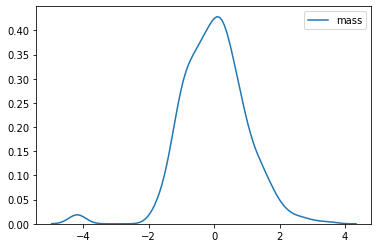

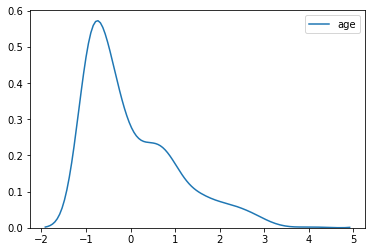

In [23]:
sns.kdeplot(X_train_diabetes_standard['mass'])
plt.show()
sns.kdeplot(X_train_diabetes_standard['age'])
plt.show()

#### Note que o [`StandardScaler`]() centra os dados em $0$. Além disso, não há um range definido, como no [`MinMaxScaler. Porém, o range das features é próximo.

#### Calculamos o desvio padrão de `'mass'` e `'age'`.

In [24]:
print(np.std(X_train_diabetes_standard['mass']))
print(np.std(X_train_diabetes_standard['age']))

1.0
0.999999999999999


#### Se os nossos dados possuem distribuição normal, os algoritmos podem se beneficiar mais utilizando [`StandardScaler`]() em vez de [`MinMaxScaler`]().

#### Desvantagem: 
- Sensível a `outliers`.

### Robust Scaler

#### Um método robusto a outlier é o RobustScaler. Essa transformação é similar à transformação MinMax, porém utilizar os Quartis 1 e 3 para aplicar o scaling, em vez dos valores máximo e mínimo.

<img src="robustScaler.png" height=289 width=161/>

#### O método implementado no [`scikit-learn`]() subtrai a mediana ($Q2$) no lugar de $Q1$.

In [25]:
robust_scaler = RobustScaler()

#### Ajustamos nosso modelo.

In [26]:
X_train_diabetes_robust = robust_scaler.fit_transform(X_train_diabetes)
X_train_diabetes_robust = pd.DataFrame(X_train_diabetes_robust, 
                                       columns = X_train_diabetes.columns
                                      )

#### Centralizamos e reescalonamos os dados com o método [`robust_scaler.transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler.transform) e convertemos o subconjunto de teste em um `dataframe`.

In [27]:
# transform
X_test_diabetes_robust = robust_scaler.transform(X_test_diabetes)
# dataframe
X_test_diabetes_robust = pd.DataFrame(X_test_diabetes_robust, 
                                      columns = X_train_diabetes.columns
                                     )

#### Checando o antes e o depois das distribuições.

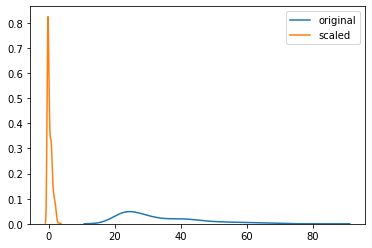

In [28]:
sns.kdeplot(X_train_diabetes['age'], 
            label = 'original'
           )
sns.kdeplot(X_train_diabetes_robust['age'], 
            label = 'scaled'
           )
plt.show()

#### Note que o `range` muda, fica mais comportado, e que não há outliers.

> **OBSERVAÇÃO**: Não há uma regra de ouro ou garantia de melhoria do modelo utilizando algum transformador. Só podemos realmente falar algo após o treinamento do modelo. Além disso, um mesmo modelo pode se beneficiar de diferentes transformadores em situações diferentes. Porém, vale salientar que determinados algoritmos, como [`PCA`](https://towardsdatascience.com/pca-a-practical-journey-preprocessing-encoding-and-inspiring-applications-64371cb134a) ou [`KMeans`](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7), exigem a aplicação de um transformador específico. No geral, as performances são parecidas com diferentes transformadores, mas essa é uma configuração que pode ser ajustada para resultar na melhor performance possível.

## Variáveis Qualitativas (Categóricas)

#### Variáveis numéricas não apresentam muitos problemas em produção. Quando falamos em variáveis [qualitativas](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) temos problemas em potencial para os quais precisamos ter uma rota de fuga.

#### Os 2 principais problemas são:

- Novos níveis nas variáveis.
- Níveis raros.

#### Antes de falar desses dois problemas, vamos mostrar como podemos codificar variáveis qualitativas como números.

#### Nesse dataset, temos as seguintes variáveis categóricas:

- `Embarked`: Indica o porto em que o passageiro embarcou.
- `Sex`: Indica o sexo do passageiro.
- `Pclass`: Classe que o passageiro viajou.

### One-Hot Encoder

#### Esse primeiro transformador já conhecemos! Isso mesmo, já conhecemos, porém chamamos ele de [`pd.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

#### Um dos principais motivos para utilizarmos o [`One-Hot Encoder`](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/) no lugar do [`.get_dummies()`](https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc) é sua integração com a classe com [`Pipelines`](https://medium.com/user-pipeline/machine-learning-feature-encoding-with-onehotencoder-inside-a-pipeline-76d440940f4b) do [`scikit-learn`](https://www.ritchieng.com/machinelearning-one-hot-encoding/), que utilizaremos na última fase da aula.

#### A ideia é que para cada nível da variável categórica se crie uma coluna, a qual poderá receber o valor $0$ ou $1$.

<img src="getDummies.png" height=2808 width=710/>

#### Vamos usar o [`OneHotEncoder`](https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a) para codificar as variáveis.

In [45]:
cat_cols = ['Embarked', 
            'Pclass', 
            'Sex'
           ]
ohe = OneHotEncoder(sparse = False)

In [46]:
X_train_titanic = X_train_titanic.loc[:, cat_cols]

In [47]:
X_train_titanic_onehot = ohe.fit_transform(X_train_titanic)

In [48]:
X_test_titanic = X_test_titanic.loc[:, cat_cols]

In [49]:
X_test_titanic_onehot = ohe.transform(X_test_titanic)

In [50]:
ohe.get_feature_names()

array(['x0_C', 'x0_Q', 'x0_S', 'x1_1st', 'x1_2nd', 'x1_3rd', 'x2_female',
       'x2_male'], dtype=object)

In [51]:
pd.DataFrame(X_test_titanic_onehot, 
             columns = ohe.get_feature_names()
            )

,x0_C,x0_Q,x0_S,x1_1st,x1_2nd,x1_3rd,x2_female,x2_male
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
102,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
104,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
105,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### Desvantagens:

- Se a variável possui muitos níveis (estados do brasil), muitas colunas serão criadas e isso pode ser um problema em termos de processamento e de alta dimensionalidade ([maldição da dimensionalidade](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)).
- Alguns modelos (árvores) se beneficiam mais de outros métodos.

### OrdinalEncoder

#### Quando houverem variáveis categóricas ordinais, estas serão melhor codificadas pelo [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html). O [`OrdinalEncoder`](https://medium.com/analytics-vidhya/types-of-categorical-data-encoding-schemes-a5bbeb4ba02b) atribui um número para cada nível da variável, de acordo com a ordem pré-estabelecida pelo usuário.

<img src="ordinalEncoder.png" height=1696 width=710/>

In [52]:
X_train_titanic_class = X_train_titanic.loc[:, ['Pclass']]

#### Note que `Poor` $<$ `Good` $<$ `Very Good` $<$ `Excellent`. 

In [53]:
order_levels = ['1st', '2nd', '3rd']

In [54]:
oe = OrdinalEncoder(categories = [order_levels])

In [55]:
oe.fit_transform(X_train_titanic_class)

array([[2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],

#### Se não especificarmos a ordem dos níveis, o transformador atribui os `labels` por ordem alfabética nos níveis.

In [56]:
oe = OrdinalEncoder()
oe.fit_transform(X_train_titanic)

array([[2., 2., 1.],
       [2., 0., 1.],
       [2., 1., 1.],
       ...,
       [2., 2., 1.],
       [2., 0., 1.],
       [2., 2., 1.]])

In [57]:
X_train_titanic

,Embarked,Pclass,Sex
173,S,3rd,male
6,S,1st,male
340,S,2nd,male
314,S,2nd,male
565,S,3rd,male
...,...,...,...
125,C,3rd,male
401,S,3rd,male
480,S,3rd,male
456,S,1st,male


### Frequency Encoder

#### Quando temos muitos níveis nas variáveis categóricas ou mesmo elas não possuem nenhum grau ordinal, podemos utilizar o [`CountFrequencyEncoder()`](https://feature-engine.readthedocs.io/en/latest/encoding/CountFrequencyEncoder.html). O método [`Frequency Encoder`](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) substitui cada nível de classe por sua frequência nos dados de treino.

In [73]:
X_train_titanic['Sex'].value_counts(normalize = True)

male      0.642975
female    0.357025
Name: Sex, dtype: float64

Por exemplo, na variável Sex, male seria substituído por 0.65 e female por 0.35.

In [74]:
cfce = CountFrequencyEncoder(encoding_method = 'frequency', 
                                        variables = ['Embarked', 
                                                     'Pclass', 
                                                     'Sex'
                                                    ]
                                       )

In [75]:
cfce.fit_transform(X_train_titanic)

,Embarked,Pclass,Sex
173,0.770248,0.485950,0.642975
6,0.770248,0.266116,0.642975
340,0.770248,0.247934,0.642975
314,0.770248,0.247934,0.642975
565,0.770248,0.485950,0.642975
...,...,...,...
125,0.186777,0.485950,0.642975
401,0.770248,0.485950,0.642975
480,0.770248,0.485950,0.642975
456,0.770248,0.266116,0.642975


### Target Encoder

#### Por fim, vamos ver o [`Target Encoder`](https://contrib.scikit-learn.org/category_encoders/targetencoder.html). Esse [método](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64) é parecido com o anterior. Porém, em vez de olhar simplesmente a freqüência dos níveis, ele observa a freqüência dos níveis nos níveis das variáveis resposta, no caso do `Target` ser categórico, e a média do `Target`, no caso do `Target` ser continuo.

In [79]:
te = TargetEncoder(cols = ['Embarked', 
                           'Pclass', 
                           'Sex'
                          ]
                  )

In [80]:
te.fit_transform(X_train_titanic, 
                 y_train_titanic
                )

,Embarked,Pclass,Sex
173,0.360515,0.231293,0.195373
6,0.360515,0.627329,0.195373
340,0.360515,0.473333,0.195373
314,0.360515,0.473333,0.195373
565,0.360515,0.231293,0.195373
...,...,...,...
125,0.566372,0.231293,0.195373
401,0.360515,0.231293,0.195373
480,0.360515,0.231293,0.195373
456,0.360515,0.627329,0.195373


In [81]:
df_train_titanic = pd.concat([X_train_titanic, 
                              y_train_titanic], 
                             axis = 1
                            )

In [82]:
df_train_titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.759259
male,0.195373


# Column Transformer

#### Até agora vimos como aplicar as transformações em dados categóricos e numéricos separadamente. Teríamos que coletar os resultados de nossas transformações e agrupá-los para formar um conjunto transformado para inserir em um modelo de Machine Learning. Agora iremos aprender a como realizar todos os processamentos em um único passo, com o auxílio das Classes [`Columns Transformer`](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) e `Pipeline`.

#### Vamos ler o `dataset` não reduzido do `titanic`.

In [83]:
df_titanic = pd.read_csv('titanic1.csv')

In [84]:
df_titanic

,Pclass,Age,Sex,Embarked,Survived
0,3rd,22.0,male,S,0
1,1st,38.0,female,C,1
2,3rd,26.0,female,S,1
3,1st,35.0,female,S,1
4,3rd,35.0,male,S,0
...,...,...,...,...,...
707,3rd,39.0,female,Q,0
708,2nd,27.0,male,S,0
709,1st,19.0,female,S,1
710,1st,26.0,male,C,1


#### Nele, temos as variáveis:

- `Embarked`: Qualitativa Nominal
- `Sex`: Qualitativa Nominal
- `Age`: Numérica Contínua
- `Pclass`: Qualitativa Ordinal
- `Survived`: Target Qualitativo Binário

#### Dessa forma, vamos utilizar os seguintes transformadores:

- OrdinalEncoder: `Pclass`
- MinMaxScaler: `Age`
- OneHotEncoder: `Sex`, `Embarked`

#### Além disso, iremos usar, ao final do processamento, o modelo de Regressão Logística do ```Scikit-Learn```

#### Para construir nosso transformador universal precisamos criar tuplas.

#### O primeiro elemento da tupla será um identificador, uma `string`, que identifica o nome do processo (pode ser qualquer nome). O segundo elemento é o transformador em si e suas propriedades, se houverem. O terceiro elemento é uma lista com o nome das colunas que irão receber o processamento.

In [87]:
pipe_cat_ordinal = ('ordinal_encoder', 
                    OrdinalEncoder(categories = [['1st', '2nd', '3rd']]), 
                    ['Pclass']
                   )
pipe_cat_one_hot = ('one_hot_encoder', 
                    OneHotEncoder(), 
                    ['Sex', 'Embarked']
                   )
pipe_num_min_max = ('min_max_scaler', 
                    MinMaxScaler(), 
                    ['Age']
                   )

#### Feito isso, colocamos tudo numa lista e passamos para a classe [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [88]:
transformers = [pipe_cat_ordinal,
                pipe_cat_one_hot,
                pipe_num_min_max
               ]
pre_processor = ColumnTransformer(transformers)

#### Por fim, usaremos a classe [`Pipeline`](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) que irá combinar as etapas de pré-processamento e treinamento/previsão.

#### Para essa classe, passamos uma lista de tuplas. Sempre o modelo vem por último!! Antes dele, pode vir qualquer transformador, qualquer classe que possua o método [`fit`]() e [`transform`]().

#### Aqui iremos passar para nosso [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) o [`pre_processor`](https://scikit-learn.org/stable/modules/preprocessing.html) que acabamos de criar. Esse será nosso `step` número 1, seguido do `step` número 2, que será o modelo de [Regressão Logística]().

In [90]:
model = Pipeline(steps = [('pre_processor', pre_processor),
                          ('reg_log', LogisticRegression(random_state = 123))
                         ]
                )

#### Vamos dividir nossos dados em treino e teste.

In [91]:
X_titanic1 = df_titanic.drop('Survived', axis = 1)
Y_titanic1 = df_titanic['Survived']
X_train_titanic1, X_test_titanic1, Y_train_titanic1, Y_test_titanic1 = train_test_split(X_titanic1, 
                                                                                        Y_titanic1, 
                                                                                        train_size = 0.85, 
                                                                                        random_state = 123
                                                                                       )

#### Com nosso `pipeline` construído, só precisamos chamar o método `.fit()` e depois o método `.predict()` para realizar previsões com nosso modelo.

In [92]:
model.fit(X_train_titanic1, Y_train_titanic1)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['1st',
                                                                              '2nd',
                                                                              '3rd']]),
                                                  ['Pclass']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(), ['Age'])])),
                ('reg_log', LogisticRegression(random_state=123))])

In [93]:
model.predict(X_test_titanic1)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

#### Vamos visualizar nosso pipeline de pré-processamento e modelagem.

In [94]:
from sklearn import set_config
set_config(display = 'diagram')

In [95]:
model

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['1st',
                                                                              '2nd',
                                                                              '3rd']]),
                                                  ['Pclass']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(), ['Age'])])),
                ('reg_log', LogisticRegression(random_state=123))])

> Observação: Além de lidar com pré-processamento dos dados, um pipeline de modelagem precisa lidar com preenchimento de valores faltosos e tratamento de novos níveis que podem surgir em variáveis categóricas. Por exemplo: digamos que treinamos um modelo para prever vendas em pontos de venda que usam PicPay. Uma das variáveis utilizadas foi o Estado ao qual o estabelecimento pertence. Contudo, o PicPay expandiu para novos Estados e, inclusive Estados que não participaram do treinamento do modelo. Dessa forma, mesmo não tendo visto nada sobre aquele Estado, o modelo deve ser capaz de realizar alguma estimativa. Aprenderemos nas aulas de classificação como tratar esse e outros problemas relacionados às variáveis categóricas, como a questão de níveis raros.